In [1]:
import numpy as np
from scipy.linalg import orthogonal_procrustes
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_viso = pd.read_csv("viso_positions.csv", header=None)
df_gpos = pd.read_csv("gpos_positions.csv", header=None)

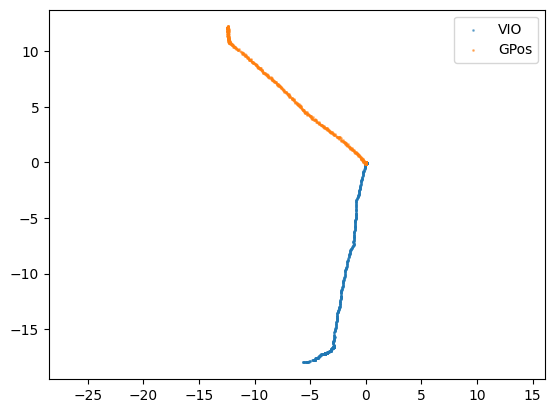

In [3]:
# 元のデータそのまま
plt.scatter(df_viso[0], df_viso[1], label="VIO", alpha=0.5, s=1)
plt.scatter(df_gpos[0], df_gpos[1], label="GPos", alpha=0.5, s=1)
plt.axis("equal")
plt.legend()

In [ ]:
# 回転行列を求める

V = df_viso.to_numpy()
G = df_gpos.to_numpy()

# G の 0番目とGの0番目を同じ位置に移動
V -= V[0]
G -= G[0]

R, _ = orthogonal_procrustes(V, G)

print(R)

if np.linalg.det(R) < 0:
    print("反転行列")
    R[:, 1] *= -1  # y軸反転で反射→回転に修正

angle_rad = np.arctan2(R[1, 0], R[0, 0])

# 角度を -π ～ π の範囲に正規化
angle_rad = angle_rad % (2 * np.pi) - np.pi

float(np.rad2deg(angle_rad))

[[-0.52387674 -0.85179408]
 [ 0.85179408 -0.52387674]]


-58.40734333279541

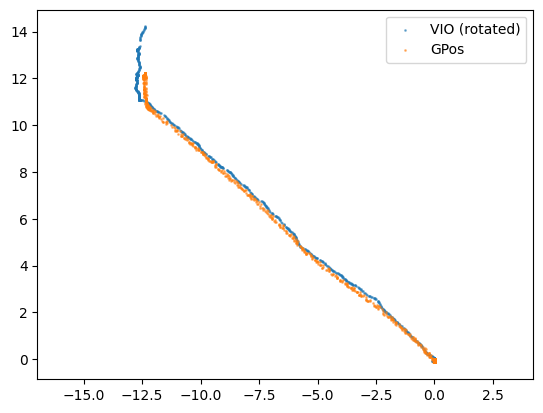

In [5]:
# 回転行列を使って V を回転すると正しい
V_rotated = V @ R

plt.scatter(V_rotated[:, 0], V_rotated[:, 1], label="VIO (rotated)", alpha=0.5, s=1)
plt.scatter(G[:, 0], G[:, 1], label="GPos", alpha=0.5, s=1)
plt.axis("equal")
plt.legend()